In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'intencity_transformed_image')

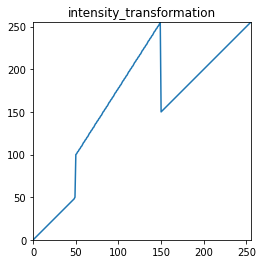

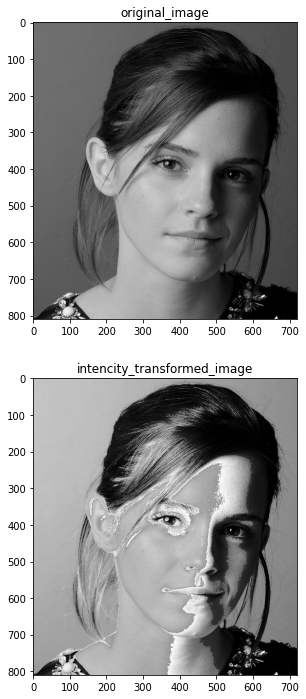

In [33]:
f = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)

assert f is not None

t1 = np.linspace(0, 50, 50)
t2 = np.linspace(50, 100, 0)
t3 = np.linspace(100, 255, 100)
t4 = np.linspace(255, 150, 0)
t5 = np.linspace(150, 255, 106)

t = np.concatenate((t1, t2, t3, t4, t5), axis = 0).astype(np.uint8)

fg, ax = plt.subplots()
ax.plot(t)

ax.set_title('intensity_transformation')
ax.set_aspect('equal')
plt.xlim([0, 255])
plt.ylim([0, 255])

assert len(t) == 256
g = cv.LUT(f, t)

f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g = cv.cvtColor(g, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# ax[0].imshow(f, cmap = 'gray', vmin=0, vmax=255)
# ax[1].imshow(g, cmap = 'gray', vmin=0, vmax=255)

ax[0].imshow(f)
ax[0].set_title('original_image')
ax[1].imshow(g)
ax[1].set_title('intencity_transformed_image')


Text(0.5, 1.0, 'white matter')

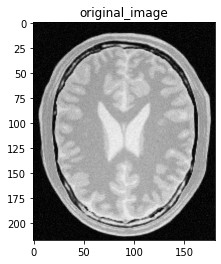

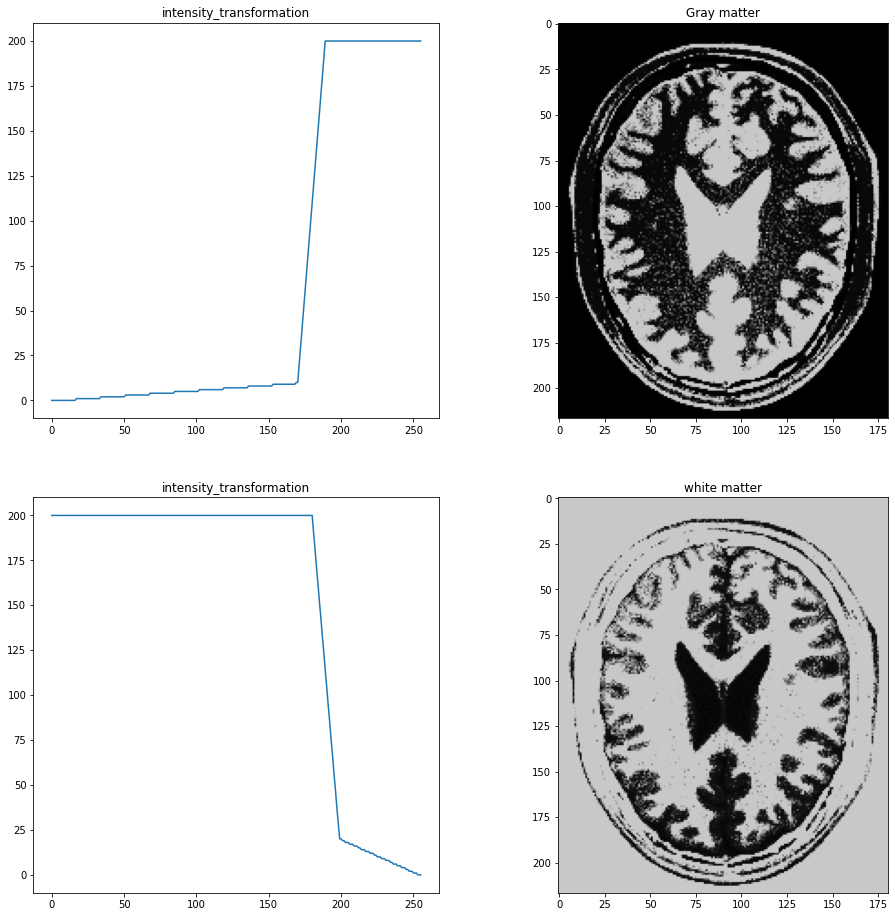

In [8]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
f = cv.cvtColor(f, cv.COLOR_BGR2RGB)

assert f is not None

t1 = np.linspace(0, 10, 170)
t2 = np.linspace(10, 200, 20)
t3 = np.linspace(200, 200, 66)

t4 = np.linspace(0, 200, 0)
t5 = np.linspace(200, 200, 180)
t6 = np.linspace(200, 20, 20)
t7 = np.linspace(20, 0, 56)


t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)
t_ = np.concatenate((t4, t5, t6, t7), axis = 0).astype(np.uint8)

fg, ax = plt.subplots()

ax.imshow(f)
ax.set_title('original_image')


# ax.set_title('intensity_transformation')                          #RGB colors for gray matter nearly 200, 127, 137
# ax.set_aspect('equal')
# plt.xlim([0, 255])
# plt.ylim([0, 255])

assert len(t) == 256
g = cv.LUT(f, t)
h = cv.LUT(f, t_)


g = cv.cvtColor(g, cv.COLOR_BGR2RGB)
h = cv.cvtColor(h, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize=(16, 16))

# ax[0].imshow(f, cmap = 'gray', vmin=0, vmax=255)
# ax[1].imshow(g, cmap = 'gray', vmin=0, vmax=255)

ax[0][0].plot(t)
ax[0][0].set_title('intensity_transformation')

ax[0][1].imshow(g)
ax[0][1].set_title('Gray matter')

ax[1][0].plot(t_)
ax[1][0].set_title('intensity_transformation')

ax[1][1].imshow(h)
ax[1][1].set_title('white matter')




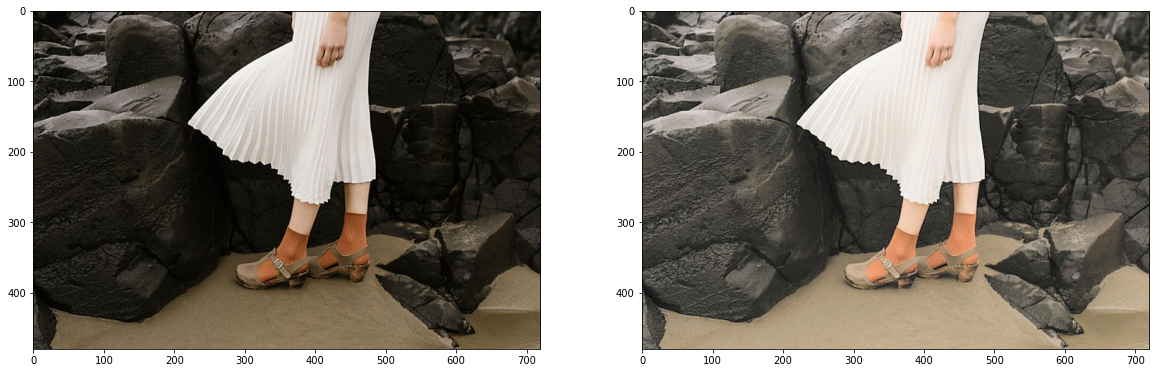

In [28]:
f = cv.imread(r'highlights_and_shadows.jpg')
assert f is not None

f1 = cv.cvtColor(f, cv.COLOR_BGR2RGB)
f2 = cv.cvtColor(f, cv.COLOR_BGR2LAB)

gamma = 0.5
t = np.array([(p/255)**gamma*255 for p in range(0, 256)]).astype(np.uint8)

f3 = cv.LUT(f2[:, :, 0], t)
f2[:,:, 0] = f3    
f4 = cv.cvtColor(f2, cv.COLOR_LAB2RGB)                                     

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(f1)
ax[1].imshow(f4)